In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.datasets import load_UCR_UEA_dataset

from sktime.classification.kernel_based import TimeSeriesSVC

from sklearn.metrics import classification_report, precision_recall_fscore_support 
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train, y_train = load_UCR_UEA_dataset(name="ArticularyWordRecognition",
                                        split='train', 
                                        return_type='numpy3D',
                                        extract_path="./data")
X_test, y_test = load_UCR_UEA_dataset(name="ArticularyWordRecognition",
                                      split='test', 
                                      return_type='numpy3D',
                                      extract_path='./data')

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(275, 9, 144) (275,)
(300, 9, 144) (300,)


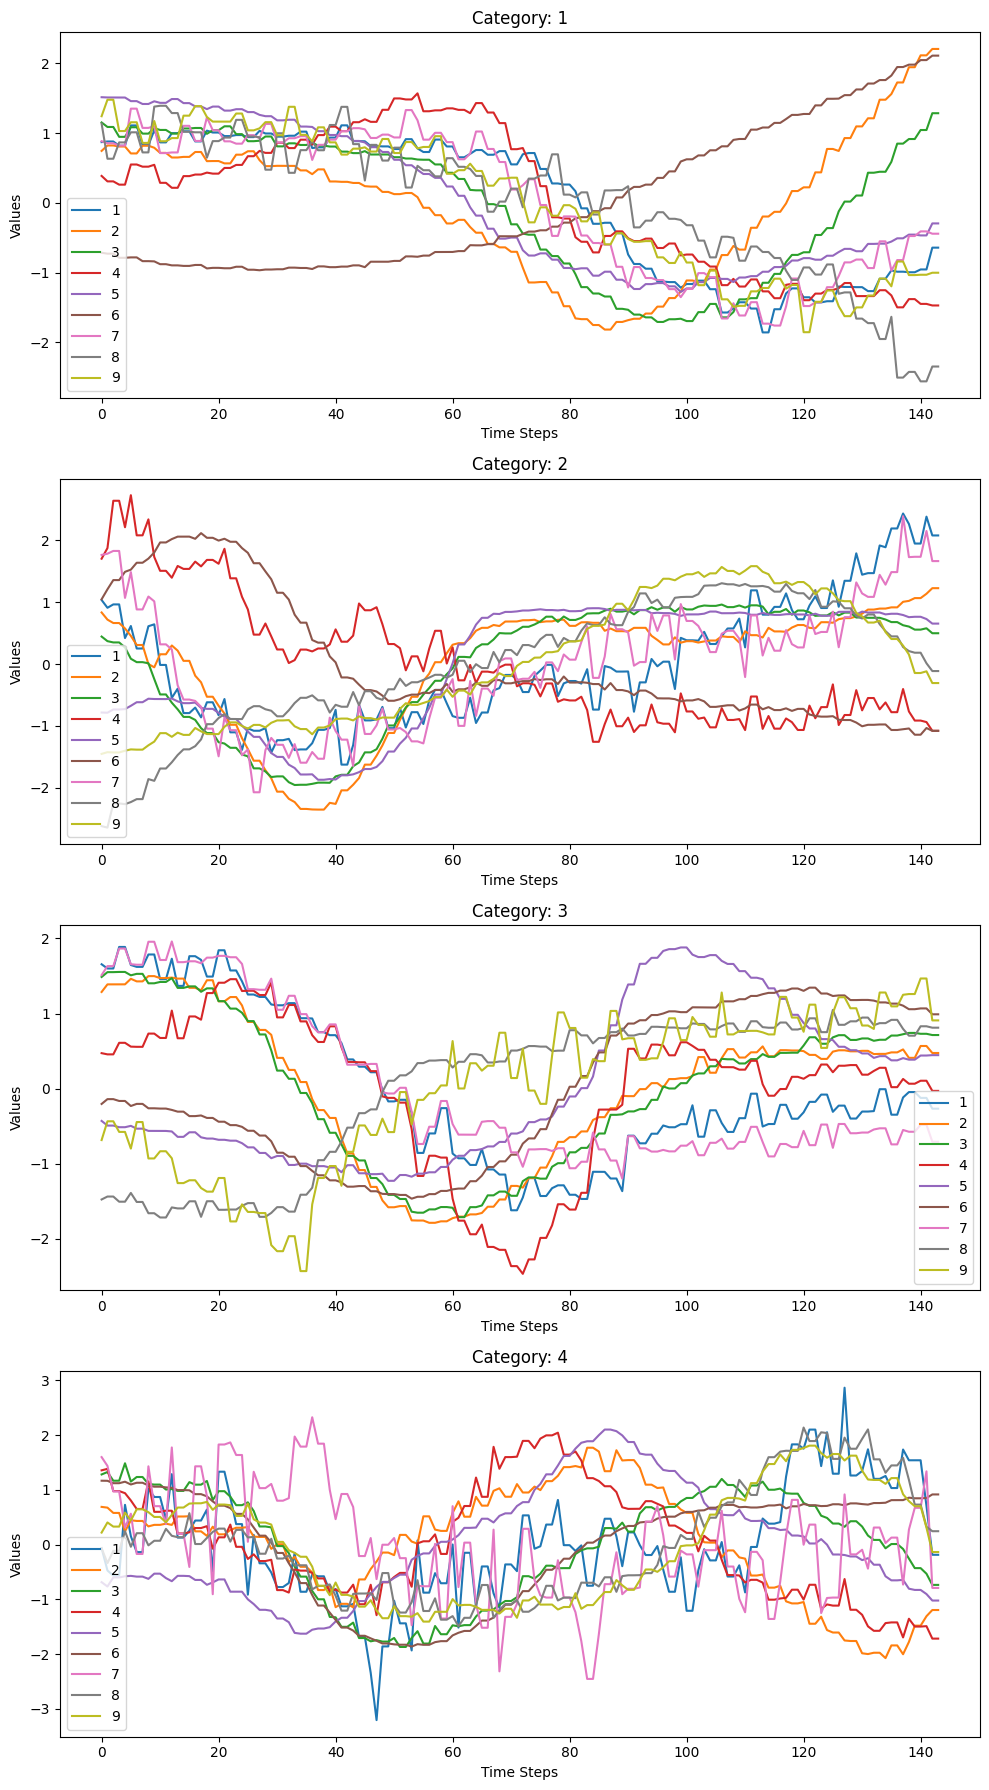

In [22]:
series_indices = [0, 11, 22, 33]
categories = ['1', '2', '3', '4']
features = np.arange(1, 10)

selected_series = X_train[series_indices]

fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in range(4):  
    for j in range(selected_series.shape[1]):
        axes[i].plot(selected_series[i, j], label=features[j])

    axes[i].set_title(f"Category: {categories[i]}")
    axes[i].set_xlabel("Time Steps")
    axes[i].set_ylabel("Values")
    axes[i].legend()

plt.tight_layout()
plt.show()

## SVC

In [14]:
from sklearn.gaussian_process.kernels import RBF
from sktime.dists_kernels import AggrDist

kernel = AggrDist(RBF())

clf = TimeSeriesSVC(kernel=kernel,
                    random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_report = classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

         1.0       1.00      0.75      0.86        12
        10.0       0.41      1.00      0.59        12
        11.0       1.00      0.83      0.91        12
        12.0       0.92      0.92      0.92        12
        13.0       1.00      0.67      0.80        12
        14.0       1.00      1.00      1.00        12
        15.0       1.00      1.00      1.00        12
        16.0       0.92      1.00      0.96        12
        17.0       1.00      1.00      1.00        12
        18.0       1.00      0.83      0.91        12
        19.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        12
        20.0       0.86      1.00      0.92        12
        21.0       0.92      0.92      0.92        12
        22.0       0.91      0.83      0.87        12
        23.0       1.00      0.83      0.91        12
        24.0       1.00      1.00      1.00        12
        25.0       1.00    

In [12]:
import numpy as np
import matplotlib.pyplot as plt

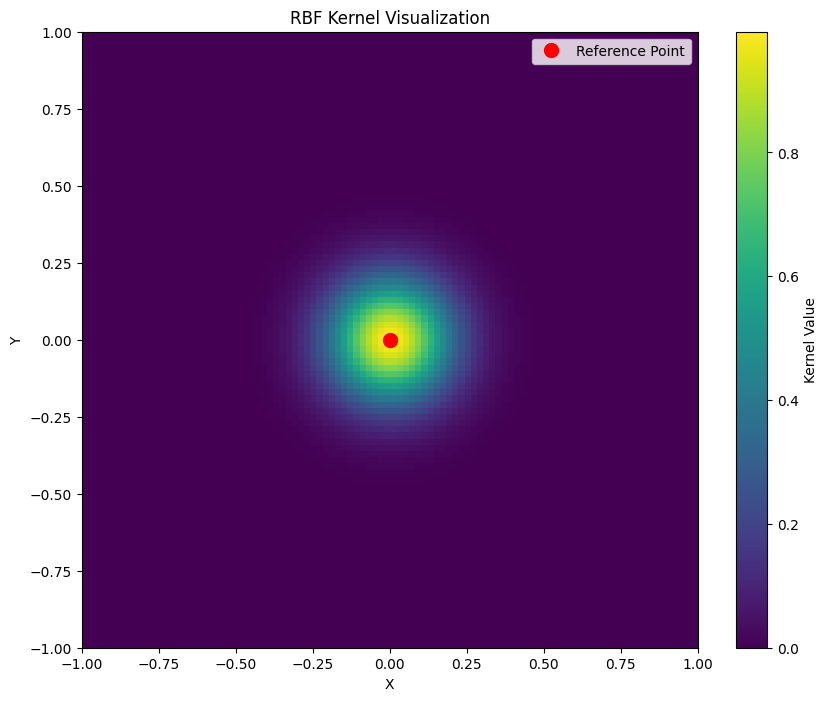

In [15]:
def rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Choose a reference point
reference_point = np.array([0, 0])

# Compute RBF kernel values
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = rbf_kernel(point, reference_point)

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Kernel Value')
plt.title('RBF Kernel Visualization')
plt.xlabel('X')
plt.ylabel('Y')

# Mark the reference point
plt.plot(reference_point[0], reference_point[1], 'ro', markersize=10, label='Reference Point')
plt.legend()

plt.show()

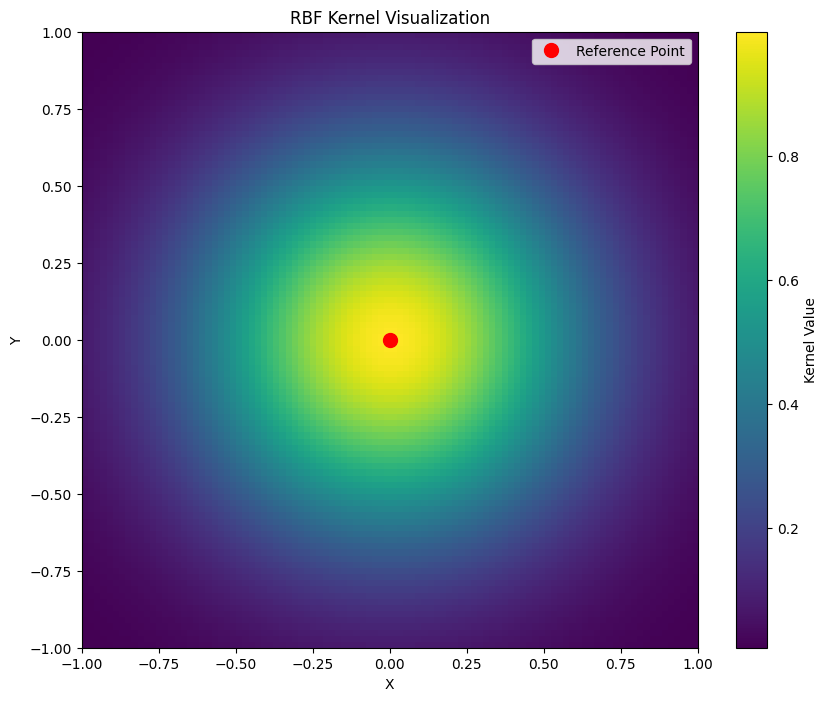

In [17]:
# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Choose a reference point
reference_point = np.array([0, 0])

# Compute RBF kernel values
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = rbf_kernel(point, reference_point, gamma=0.1)

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Kernel Value')
plt.title('RBF Kernel Visualization')
plt.xlabel('X')
plt.ylabel('Y')

# Mark the reference point
plt.plot(reference_point[0], reference_point[1], 'ro', markersize=10, label='Reference Point')
plt.legend()

plt.show()